In [2]:
fnameTemp='https://goldsmr5.gesdisc.eosdis.nasa.gov/opendap/MERRA2/M2I3NPASM.5.12.4/%4.4i/%2.2i/MERRA2_300.inst3_3d_asm_Np.%4.4i%2.2i%2.2i.nc4'

fname300Temp='https://goldsmr4.gesdisc.eosdis.nasa.gov/opendap/MERRA2/M2T1NXSLV.5.12.4/%4.4i/%2.2i/MERRA2_300.tavg1_2d_r_Nx.%4.4i%2.2i%2.2i.nc4'
fname400Temp='https://goldsmr4.gesdisc.eosdis.nasa.gov/opendap/MERRA2/M2T1NXSLV.5.12.4/%4.4i/%2.2i/MERRA2_300.tavg1_2d_slv_Nx.%4.4i%2.2i%2.2i.nc4'
#https://goldsmr4.gesdisc.eosdis.nasa.gov/opendap/MERRA2/M2T1NXSLV.5.12.4/2001/05/MERRA2_300.tavg1_2d_slv_Nx.20010501.nc4.xml

import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime
levs=[0,1,6,10,16]

nx1,nx2=97,191+1
ny1,ny2=201,279+1

fname300Temp='https://goldsmr4.gesdisc.eosdis.nasa.gov/opendap/MERRA2/M2T1NXFLX.5.12.4/%4.4i/%2.2i/MERRA2_300.tavg1_2d_flx_Nx.%4.4i%2.2i%2.2i.nc4'
fname400Temp='https://goldsmr4.gesdisc.eosdis.nasa.gov/opendap/MERRA2/M2T1NXFLX.5.12.4/%4.4i/%2.2i/MERRA2_400.tavg1_2d_flx_Nx.%4.4i%2.2i%2.2i.nc4'
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime
levs=[0,1,6,10,16]

nx1,nx2=97,191+1
ny1,ny2=201,279+1

import xarray as xr
def get_merra2(c_date,it):
    if c_date.year<2011:
        fname=fname300Temp%(c_date.year,c_date.month,c_date.year,c_date.month,c_date.day)
    else:
        fname=fname400Temp%(c_date.year,c_date.month,c_date.year,c_date.month,c_date.day)
    print(fname)
    ncfile=nc.Dataset(fname)
    lon=ncfile.variables['lon'][nx1:nx2]
    lat=ncfile.variables['lat'][ny1:ny2]
    prectot=ncfile.variables['PRECTOT'][::it,ny1:ny2,nx1:nx2]
    
    #print(ncfile)
    return lon,lat,prectot,ncfile
import xarray as xr
import glob
fmerra=glob.glob('MERRA_SUB/MERRA2_*.nc')
fmerra=sorted(fmerra)
#print(fmerra)
for year in range(2007,2021):
    st_date=datetime.datetime(year,5,1)
    it=3
    for days in range(0,91):
        c_date=st_date+datetime.timedelta(days=days)
        fname='MERRA_SUB/MERRA2_FLX_%4.4i_%2.2i_%2.2i.nc'%(year,c_date.month,c_date.day)
        if fname in fmerra:
            print('file exists',fname)
            continue
        try:
            lon,lat,prectot,ncfile=get_merra2(c_date,it)
        except:
            print('error reading file',c_date)
            continue
        #print(fname)
        #break
        prectot=xr.DataArray(prectot,dims=['time','lat','lon'],coords={'time':ncfile.variables['time'][::it],'lat':lat,'lon':lon})

    # make xr dataset
    
        ds=xr.Dataset({'prectot':prectot})
    
        ds.to_netcdf('MERRA_SUB/MERRA2_FLX_%4.4i_%2.2i_%2.2i.nc'%(year,c_date.month,c_date.day),\
                     encoding={'prectot':{'zlib':True,'complevel':9},})
    
        ncfile.close()
        #break
    #break


file exists MERRA_SUB/MERRA2_FLX_2007_05_01.nc
file exists MERRA_SUB/MERRA2_FLX_2007_05_02.nc
file exists MERRA_SUB/MERRA2_FLX_2007_05_03.nc
file exists MERRA_SUB/MERRA2_FLX_2007_05_04.nc
file exists MERRA_SUB/MERRA2_FLX_2007_05_05.nc
file exists MERRA_SUB/MERRA2_FLX_2007_05_06.nc
file exists MERRA_SUB/MERRA2_FLX_2007_05_07.nc
file exists MERRA_SUB/MERRA2_FLX_2007_05_08.nc
file exists MERRA_SUB/MERRA2_FLX_2007_05_09.nc
file exists MERRA_SUB/MERRA2_FLX_2007_05_10.nc
file exists MERRA_SUB/MERRA2_FLX_2007_05_11.nc
file exists MERRA_SUB/MERRA2_FLX_2007_05_12.nc
file exists MERRA_SUB/MERRA2_FLX_2007_05_13.nc
file exists MERRA_SUB/MERRA2_FLX_2007_05_14.nc
file exists MERRA_SUB/MERRA2_FLX_2007_05_15.nc
file exists MERRA_SUB/MERRA2_FLX_2007_05_16.nc
file exists MERRA_SUB/MERRA2_FLX_2007_05_17.nc
file exists MERRA_SUB/MERRA2_FLX_2007_05_18.nc
file exists MERRA_SUB/MERRA2_FLX_2007_05_19.nc
file exists MERRA_SUB/MERRA2_FLX_2007_05_20.nc
file exists MERRA_SUB/MERRA2_FLX_2007_05_21.nc
file exists M

In [3]:
fname=fname300Temp%(c_date.year,c_date.month,c_date.year,c_date.month,c_date.day)
print(fname)
fh=nc.Dataset(fname)

https://goldsmr4.gesdisc.eosdis.nasa.gov/opendap/MERRA2/M2T1NXFLX.5.12.4/2007/05/MERRA2_300.tavg1_2d_flx_Nx.20070501.nc4


In [4]:
print(fh)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    History: Original file generated: Sun Dec 21 21:51:23 2014 GMT
    Comment: GMAO filename: d5124_m2_jan00.tavg1_2d_flx_Nx.20070501.nc4
    Filename: MERRA2_300.tavg1_2d_flx_Nx.20070501.nc4
    Conventions: CF-1
    Institution: NASA Global Modeling and Assimilation Office
    References: http://gmao.gsfc.nasa.gov
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: 5.12.4
    TemporalRange: 1980-01-01 -> 2016-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: M2T1NXFLX
    GranuleID: MERRA2_300.tavg1_2d_flx_Nx.20070501.nc4
    ProductionDateTime: Original file generated: Sun Dec 21 21:51:23 2014 GMT
    LongName: MERRA2 tavg1_2d_flx_Nx: 2d,1-Hourly,Time-Averaged,Single-Level,Assimilation,Surface Flux Diagnostics
    Title: MERRA2 tavg1_2d_flx_Nx: 2d,1-Hourly,Time-Averaged,Single-Level,Assimilation,Surface Flux Diagnostics
    SouthernmostLatitude

In [3]:
ds.to_netcdf('MERRA_SUB/MERRA2_%4.4i_%2.2i_%2.2i.nc'%(year,c_date.month,c_date.day),encoding={'u500':{'zlib':True,'complevel':9},\
                                                                                        'v500':{'zlib':True,'complevel':9},\
                                                        'u850':{'zlib':True,'complevel':9},'v850':{'zlib':True,'complevel':9},\
                                                        'h500':{'zlib':True,'complevel':9},'h850':{'zlib':True,'complevel':9},\
                                                        'slp':{'zlib':True,'complevel':9},'TQL':{'zlib':True,'complevel':9},\
                                                        'TQV':{'zlib':True,'complevel':9},\
                                                        'QV2M':{'zlib':True,'complevel':9},'QV10M':{'zlib':True,'complevel':9},\
                                                        'Q500':{'zlib':True,'complevel':9},'Q850':{'zlib':True,'complevel':9},\
                                                        'T500':{'zlib':True,'complevel':9},'T850':{'zlib':True,'complevel':9},\
                                                        'U250':{'zlib':True,'complevel':9},'V250':{'zlib':True,'complevel':9},\
                                                        'T250':{'zlib':True,'complevel':9},'Q250':{'zlib':True,'complevel':9},\
                                                        'OMEGA500':{'zlib':True,'complevel':9}})


(4, 42, 79, 95)
(42,)


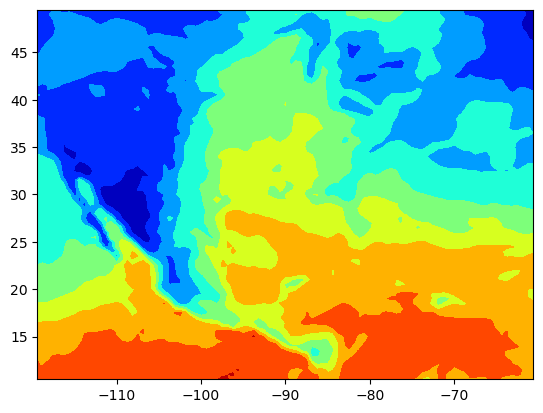

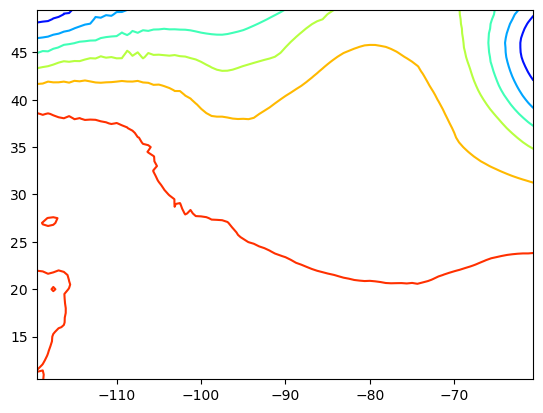

In [47]:
#print(ncfile)
#print(lat)
#print(lon)

print(qv.shape)
print(lev.shape)

plt.contourf(lon[b],lat[a],QV2M[0,:,:],cmap='jet')
plt.figure()
plt.contour(lon[b],lat[a],h850[0,:,:],cmap='jet')
#print(lev[[0,1,6,10,16]])
#a=np.nonzero((lat>10)&(lat<50))
#b=np.nonzero((lon>-120)&(lon<-60))
#print(b[0][0],b[0][-1])
#print(a[0][0],a[0][-1])
#print(ncFile.variables['T'].shape)
#print(lon[b])
